In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
#%matplotlib inline

In [64]:
# Input data files consisting of the images
pics = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")

In [65]:
print("pics: ", pics.shape)  #400 imagens de 64pixeis x 64pixeis
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


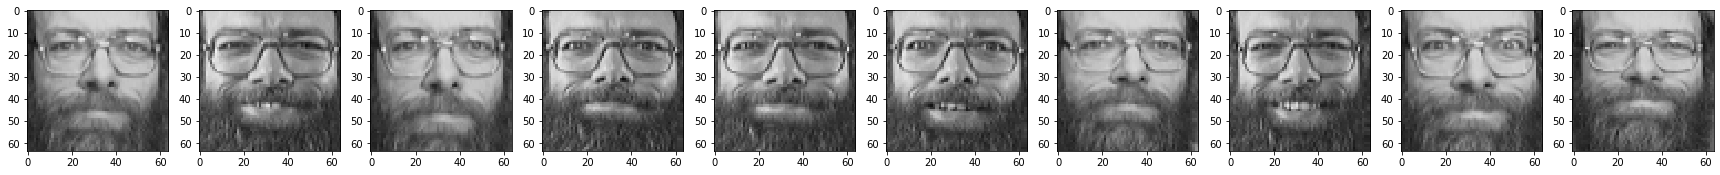

In [66]:
# Sample images of a subject
img_cnt = 10
plt.figure(figsize=(24,24))
for i in range(img_cnt):
    plt.subplot(1,10,i+1)
    x=pics[i+360] # 4th subject
    imshow(x)
plt.show()

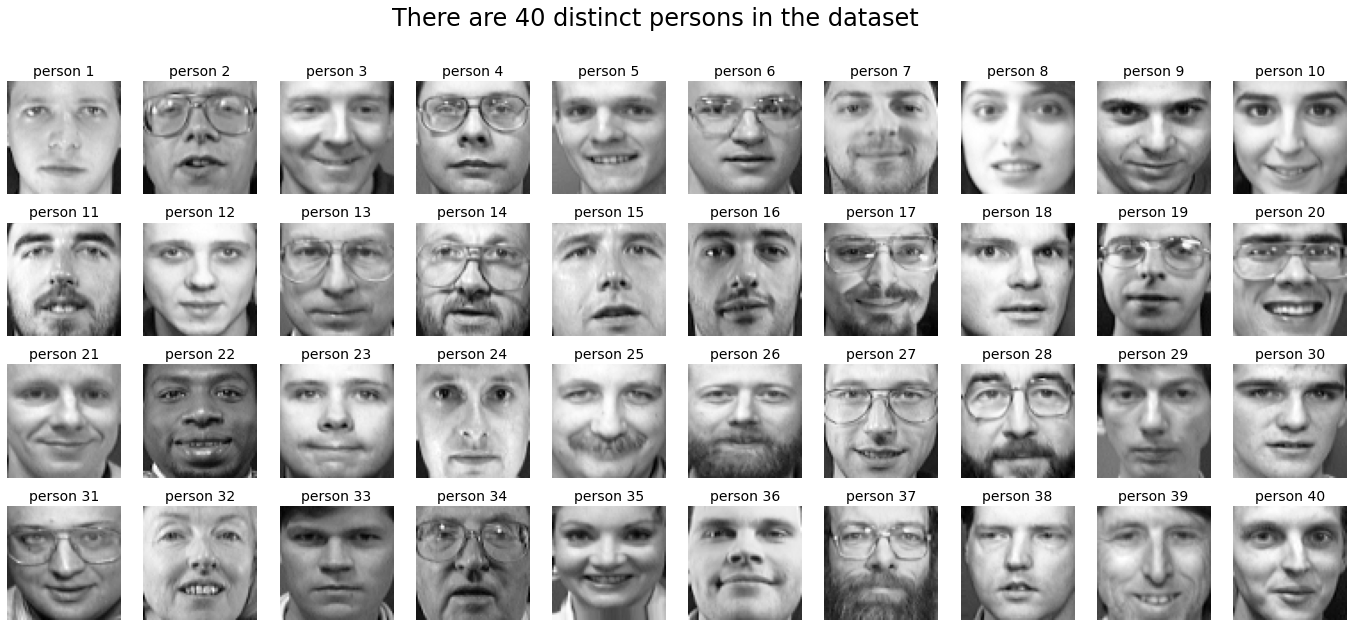

In [67]:
fig = plt.figure(figsize=(24, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=14)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24)
plt.show()

In [68]:
#Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

#Y = labels.reshape(1,1) # store labels in Y
Y = labels
X=pics.reshape(pics.shape[0], pics.shape[1]*pics.shape[2]) # reshape and store images in X

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (400, 4096)
Y shape: (400,)


The data set contains 10 face images for each subject. Of the face images, 80 percent will be used for training, 20 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 8 training images and 2 test images for each subject. You can play with training and test rates.

In [69]:
#Split data for train and test purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320,)
y_test:  (80,)


In [70]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

In [71]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

In [89]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=3,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(33):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(y_pred,y_test,i):
    return 'predicted: %s\n true: %s'%(y_pred[i],y_test[i])

# funtion for plotting important elements
def plotting_fig(s):
    fig=plt.figure(figsize=(7,7))
    for i in range(49):
        ax=fig.add_subplot(7,7,i+1)
        ax.imshow(s[i], cmap=plt.cm.bone)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [72]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf=svm.SVC()
grid={"C":[1e2, 1e3, 5e3, 1e4, 5e4, 1e5], "gamma": [1e-3, 5e-4, 1e-4, 5e-3]}
abc=GridSearchCV(clf,grid)

In [73]:

abc.fit(x_train, y_train)

pred=abc.predict(x_test)
abc.best_estimator_

SVC(C=100.0, gamma=0.0005)

In [76]:
print('Accuracy score is ',abc.score(x_test,y_test)*100)

Accuracy score is  97.5


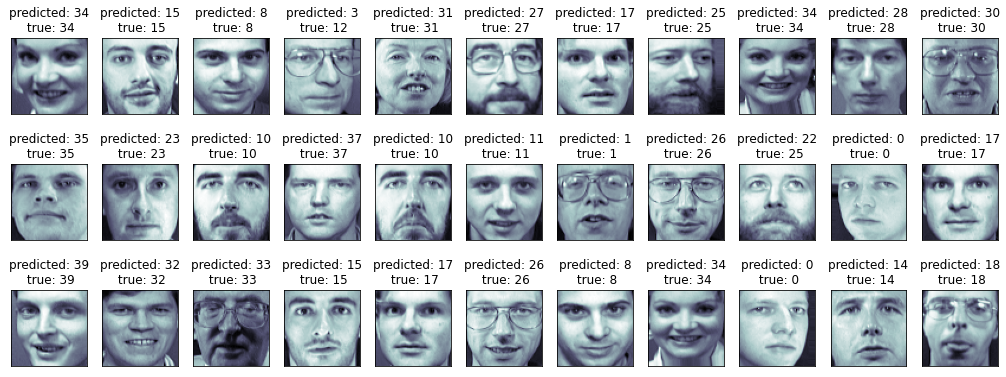

In [79]:
#showing comparison of actual values with predicted ones
prediction = [title(pred,y_test,i) for i in range(pred.shape[0])]
plot_gallery(x_test,prediction,64,64)

In [115]:
#With pca

from sklearn.decomposition import PCA


# running principle component analysis for finding number of components
pca=PCA()
pca.fit(x_train)



# calculating number of features to be kept for 95% variance
k=0
total=sum(pca.explained_variance_)
print(total)
current_sum=0

while current_sum/total<0.95:
    current_sum+=pca.explained_variance_[k]
    k=k+1
print(k)
k+10


79.05873445441244
110


120

In [116]:
# running PCA provided with number of components to retain
pca=PCA(n_components=k,whiten= True)
x_transformed=pca.fit_transform(x_train)
x_transformed.shape

(320, 110)

In [117]:
x_train_pca=x_transformed


x_test_pca= pca.transform(x_test)
x_test_pca.shape



(80, 110)

In [118]:


x_approx= pca.inverse_transform(x_transformed)
x_approx= x_approx.reshape((320,64,64))



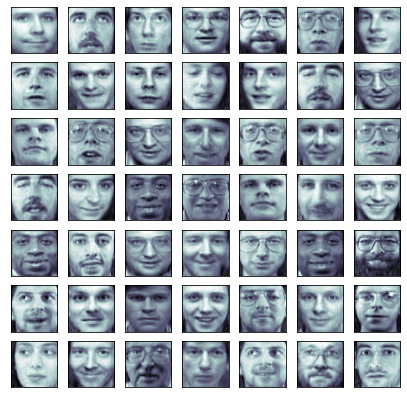

In [119]:


plotting_fig(x_approx)      # images after keeping only 95% of varience



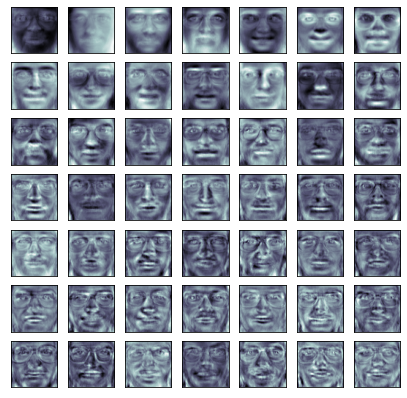

In [120]:
eig_v= pca.components_.reshape((k,64,64))   # regenerated images from principle components only
plotting_fig(eig_v)

In [121]:
abc.fit(x_train_pca, y_train)
pred=abc.predict(x_test_pca)

In [122]:
print('Accuracy score is ',abc.score(x_test_pca,y_test)*100)

Accuracy score is  97.5


In [ ]:
#Acrescentei
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x_train, y_train)
RF_accuracy = round(clf.score(x_test, y_test)*100,2)

print("RF_accuracy is %", RF_accuracy)

list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=num_words,
              input_length = training_length,
              output_dim=100,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_words, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Acrescentei
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1) #sgd, adam, lbfgs
clf = clf.fit(x_train, y_train)
MLP_accuracy = round(clf.score(x_test, y_test)*100,2)

print("MLP_accuracy is %", MLP_accuracy)

list_names.append("MLP")
list_accuracy.append(MLP_accuracy)

#MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1, solver='lbfgs')

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
LR_accuracy = round(lr.score(x_test, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 400, random_state = 2)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

print("RF_accuracy is %", RF_accuracy)

list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names.append("KNN")
list_accuracy.append(Knn_accuracy)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
#from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
#from sklearn.cross_validation import train_test_split
#x_train, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
#                                                random_state=42)


In [ ]:
#Acrescentei
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(x_train, y_train)
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
yfit = model.predict(x_test)


In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()